*The following materials (including text, code, and figures) were adapted from the "SciPy 2017 Scikit-learn Tutorial" by Alexandre Gramfort and Andreas Mueller. The contents of their tutorial are licensed under Creative Commons CC0 1.0 Universal License as work dedicated to the public domain, and can be found at https://github.com/amueller/scipy-2017-sklearn.*

# Introduction to Machine Learning in Python

## What is Machine Learning?

Machine learning is the process of extracting knowledge from data automatically, usually with the goal of making predictions on new, unseen data. A classical example is a spam filter, for which the user keeps labeling incoming mails as either spam or not spam. A machine learning algorithm then "learns" a predictive model from data that distinguishes spam from normal emails, a model which can predict for new emails whether they are spam or not.   

Central to machine learning is the concept of **automating decision making** from data **without the user specifying explicit rules** how this decision should be made.

For the case of emails, the user doesn't provide a list of words or characteristics that make an email spam. Instead, the user provides examples of spam and non-spam emails that are labeled as such.

The second central concept is **generalization**. The goal of a machine learning model is to predict on new, previously unseen data. In a real-world application, we are not interested in marking an already labeled email as spam or not. Instead, we want to make the user's life easier by automatically classifying new incoming mail.

<img src="figures/supervised_workflow.svg" width="100%">

The data is presented to the algorithm usually as a two-dimensional array (or matrix) of numbers. Each data point (also known as a *sample* or *training instance*) that we want to either learn from or make a decision on is represented as a list of numbers, a so-called feature vector, and its containing features represent the properties of this point. 

Later, we will work with a popular dataset called *Iris* -- among many other datasets. Iris, a classic benchmark dataset in the field of machine learning, contains the measurements of 150 iris flowers from 3 different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. 


We represent each flower sample as one row in our data array, and the columns (features) represent the flower measurements in centimeters. For instance, we can represent this Iris dataset, consisting of 150 samples and 4 features, a 2-dimensional array or matrix $\mathbb{R}^{150 \times 4}$ in the following format:


$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{4}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{4}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(150)} & x_{2}^{(150)} & x_{3}^{(150)} & \dots  & x_{4}^{(150)}
\end{bmatrix}.
$$

(The superscript denotes the *i*th row, and the subscript denotes the *j*th feature, respectively.

There are two kinds of machine learning we will talk about today: ***supervised learning*** and ***unsupervised learning***

### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of both input features and a desired output, such as in the spam / no-spam example.
The task is to construct a model (or program) which is able to predict the desired output of an unseen object
given the set of features.

Some more complicated examples are:

- Given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- Given a photograph of a person, identify the person in the photo.
- Given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like.
- Given a persons age, education and position, infer their salary

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**:

- **In classification, the label is discrete**, such as "spam" or "no spam". In other words, it provides a clear-cut distinction between categories. Furthermore, it is important to note that class labels are nominal, not ordinal variables. Nominal and ordinal variables are both subcategories of categorical variable. Ordinal variables imply an order, for example, T-shirt sizes "XL > L > M > S". On the contrary, nominal variables don't imply an order, for example, we (usually) can't assume "orange > blue > green".


- **In regression, the label is continuous**, that is a float output. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

In supervised learning, there is always a distinction between a **training set** for which the desired outcome is given, and a **test set** for which the desired outcome needs to be inferred. The learning model fits the predictive model to the training set, and we use the test set to evaluate its generalization performance.


### Unsupervised Learning

In **Unsupervised Learning** there is no desired output associated with the data.
Instead, we are interested in extracting some form of knowledge or model from the given data.
In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning is often harder to understand and to evaluate.

Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we’ll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- Given detailed observations of distant galaxies, determine which features or combinations of
  features summarize best the information.
- Given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- Given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.
- Given a large collection of news articles, find recurring topics inside these articles.
- Given a collection of images, cluster similar images together (for example to group them when visualizing a collection)

Sometimes the two may even be combined: e.g. unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

### (simplified) Machine learning taxonomy

<img src="figures/ml_taxonomy.png" width="80%">

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being "zeros" for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than NumPy arrays.

As we recall from the previous section (or Jupyter notebook), we represent samples (data points or instances) as rows in the data array, and we store the corresponding features, the "dimensions," as columns.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different iris flower species.  There are three different species of iris
in this particular dataset as illustrated below:

Iris Setosa
<img src="figures/iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="50%">

### Quick Question:

**Let's assume that we are interested in categorizing new observations; we want to predict whether unknown flowers are  Iris-Setosa, Iris-Versicolor, or Iris-Virginica flowers, respectively. Based on what we've discussed in the previous section, how would we construct such a dataset?***

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number *j* must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

For future experiments with machine learning algorithms, we recommend you to bookmark the [UCI machine learning repository](http://archive.ics.uci.edu/ml/), which hosts many of the commonly used datasets that are useful for benchmarking machine learning algorithms -- a very popular resource for machine learning practioners and researchers. Conveniently, some of these datasets are already included in scikit-learn so that we can skip the tedious parts of downloading, reading, parsing, and cleaning these text/CSV files. You can find a list of available datasets in scikit-learn at: http://scikit-learn.org/stable/datasets/#toy-datasets.

For example, scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [3]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [4]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

Using the NumPy's bincount function (above), we can see that the classes are distributed uniformly in this dataset - there are 50 flowers from each species, where

- class 0: Iris-Setosa
- class 1: Iris-Versicolor
- class 2: Iris-Virginica

These class names are stored in the last attribute, namely ``target_names``:

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize one or two of the dimensions
at a time using a simple histogram or scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

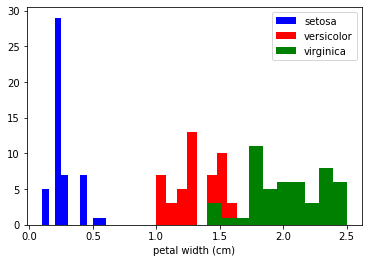

In [9]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

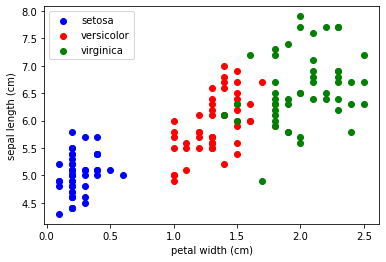

In [10]:
x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Training and Testing Data
=====================================

To evaluate how well our supervised models generalize, we can split our data into a training and a test set:

<img src="figures/train_test_split_matrix.svg" width="100%">

Here, we use 80% of the data as training, and 20% testing. but there are no hard and fast rules. The most important thing is to fairly evaluate your system on data it *has not* seen during training!

In [12]:
## CODE CELL 9

from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[2 2 0 0 1 1 2 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1
 2 2 0 1 1 2 0 2 1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0
 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1
 1 2 2 1 0 1 1 2 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]


**Tip: Stratified Split**

Especially for relatively small datasets, it's better to stratify the split. Stratification means that we maintain the original class proportion of the dataset in the test and training sets. For example, after we randomly split the dataset as shown in the previous code example, we have the following class proportions in percent:

In [13]:
## CODE CELL 10

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [30.83333333 36.66666667 32.5       ]
Test: [43.33333333 20.         36.66666667]


In [14]:
## CODE CELL 11

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


# Cross-Validation and scoring methods

In the previous sections, we split our dataset into two parts, a training set and a test set. We used the training set to fit our model, and we used the test set to evaluate its generalization performance -- how well it performs on new, unseen data.


<img src="figures/train_test_split.svg" width="100%">


However, often (labeled) data is precious, and this approach lets us only use ~ 3/4 of our data for training. On the other hand, we will only ever try to apply our model 1/4 of our data for testing.
A common way to use more of the data to build a model, but also get a more robust estimate of the generalization performance, is cross-validation.
In cross-validation, the data is split repeatedly into a training and non-overlapping test-sets, with a separate model built for every pair. The test-set scores are then aggregated for a more robust estimate.

The most common way to do cross-validation is k-fold cross-validation, in which the data is first split into k (often 5 or 10) equal-sized folds, and then for each iteration, one of the k folds is used as test data, and the rest as training data:

<img src="figures/cross_validation.svg" width="100%">

In [15]:
## CODE CELL 12

from sklearn.model_selection import StratifiedKFold

In [16]:
## CODE CELL 13

cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


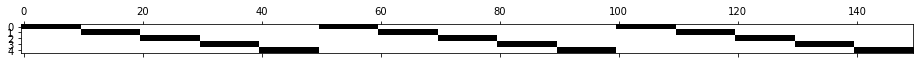

In [17]:
## CODE CELL 14

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')
    
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

# Supervised Learning -- Classification Part 1

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [18]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

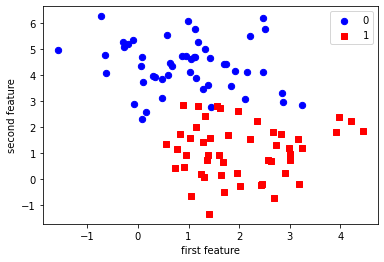

In [19]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right')

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

1. a training set that the learning algorithm uses to fit the model
2. a test set to evaluate the generalization performance of the model

The ``train_test_split`` function from the ``model_selection`` module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). For instance, we first import the logistic regression class.

In [21]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

Logistic Regression is used when the dependent variable(target) is categorical.
For example,


*  To predict whether an email is spam (1) or (0)
*   Whether the tumor is malignant (1) or not (0)

The model that is used in logistic regression is:
$$
p(X) = \frac{1}{1 + e^{-X\beta}},
$$
where $\beta = \left(\beta_0,\beta_1,\dots,\beta_m\right)^T$ is a column vector of coefficients, $X$ has been extended to include a column of ones, and by multiplication we mean the standard vector dot product.


linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.


<img src="figures/logistic_linear_compare.jpg" width="100%">

<img src="figures/logstic_eqn.jpg" width="100%">

<img src="figures/cost_fn_logistics.png" width="100%">

In [22]:
X_train.shape

(75, 2)

In [23]:
y_train.shape

(75,)

To build the model from our data, that is, to learn how to classify new points, we call the ``fit`` method with the training data and corresponding training labels (the desired output for the training data point):

In [24]:
classifier.fit(X_train, y_train)

LogisticRegression()

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [25]:
prediction = classifier.predict(X_test)

In [26]:
print('prediction:', prediction)
print('true labels:', y_test)

prediction: [1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
true labels: [1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


In [27]:
classifier.score(X_test, y_test)

0.84

In [28]:
classifier.score(X_train, y_train)

0.9733333333333334

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

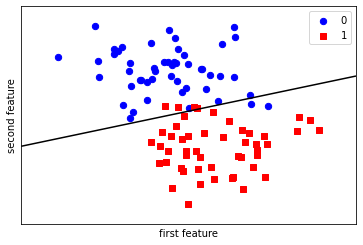

In [29]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right')

Iteration while optimising logistic regression cost function


<img src="figures/iteration.gif" width="100%">

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [30]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.87015709 -2.23877721]]
[4.64737766]


## Interpreting Logistic Regression

One nice thing about this algorithm is that we can interpret the results. This is always a nice feature of an algorithm.

Reconsider the statistical model that we fit:
$$
p(X) = \frac{1}{1 + e^{- X \beta}}.
$$
Rearranging this equation we find the following:
$$
\log\left(\frac{p(X)}{1-p(X)}\right) =  X \beta.
$$
The expression $p(X)/(1-p(X))$ is known as the odds of the event $y=1$. So the statistical model for logistic regression is really just a linear model for the $\log$ odds of being class $1$. This allows us to interpret the coefficients of our model.

Look at the model we just fit:
$$
\log\left(\frac{p(x)}{1-p(x)}\right) = \beta_0 + \beta_1 x, \text{ or } \text{Odds}|x = C e^{\beta_1 x}
$$
where $x$ is the feature, and $C$ is some constant we don't care about. 

So if we increase $x$ from say $d$ to $d+1$, a $1$ unit increase, then our odds are $e^{\beta_1}$ units times larger (or smaller depending on the value of $\beta_1$), we can see this below:
$$
\frac{\text{Odds}|x = d+1}{\text{Odds}|x=d} = \frac{e^{\beta_1 (d+1)}}{e^{\beta_1 d}} = e^{\beta_1}
$$

Let's look at the coefficient from our phony data logistic regression and interpret it.

# K Nearest Neighbors

Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

You can find nice intutative visulization demo of KNN from stanford university on the following link

http://vision.stanford.edu/teaching/cs231n-demos/knn/

<img src="figures/KNN-Classification.gif" alt="Confusion Matrix Image" style="width:600px;">

The interface is exactly the same as for ``LogisticRegression`` above.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we want to look at three nearest neighbors:

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

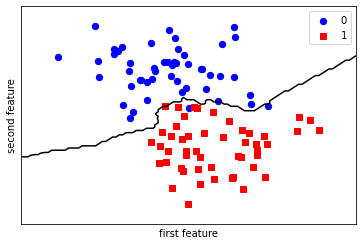

In [34]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right')

plt.show()

In [35]:
knn.score(X_test, y_test)

0.92

# Model Evaluation and Scoring Metrics

The default scores in scikit-learn are ``accuracy`` for classification, which is the fraction of correctly classified samples, and ``r2`` for regression, with is the coefficient of determination.

These are reasonable default choices in many scenarious; however, depending on our task, these are not always the definitive or recommended choices.

For example: Our data might be highly imbalance.

Scikit-learn has many helpful methods in the ``sklearn.metrics`` module that can help us with model evaluation.

In [36]:
# Using k=3 and fitting/predicting on the iris dataset

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.50,
                                                    random_state=42,
                                                    stratify=y)

classifier = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
print("Accuracy: {}".format(classifier.score(X_test, y_test)))

Accuracy: 0.92


Here, we predicted 92% of samples correctly. For multi-class problems, it is often interesting to know which of the classes are hard to predict, and which are easy, or which classes get confused. One way to get more information about misclassifications is the ``confusion_matrix``, which shows for each true class, how frequent a given predicted outcome is.

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[25,  0,  0],
       [ 0, 25,  0],
       [ 0,  6, 19]])

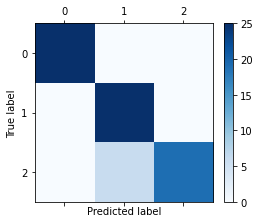

In [38]:
plt.matshow(confusion_matrix(y_test, y_test_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

We can see that most entries are on the diagonal, which means that we predicted nearly all samples correctly. The off-diagonal entries show us that some 2s were classified as 1s. 

### Accuracy Isn't Everything

As we did with knn we could use cross validation to decide on the best cutoff based on the average accuracy over the splits. That may work for this toy set, but sometimes accuracy is a misleading measure. With our dataset about $45\%$ of the data are $0$ and $55\%$ are $1$. What if it was a more extreme split, say $90\%$ in class $0$ and $10\%$ in class $1$. In that instance we could build a $90\%$ accurate classifier by just labeling everything as $0$. However, we didn't correctly identify any of the class $1$ objects. This would be awful, if for instance class $1$ represented a person that has a disease, for instance COVID19.

So it may be important to look at some alternative performance measures.

#### Now Things Start To Get Confusing

Additional performance measures are derived from the confusion matrix, pictured below.

<img src="figures/conf_mat.jpg" alt="Confusion Matrix Image" style="width:400px;">

Here the diagonal of the box represents data points that were correctly predicted by the algorithm, the off-diagonal represents points that are incorrectly predicted by the algorithm. Contained within each box of the confusion matrix are counts of how the algorithm sorted. For instance, in the TP box would be the total number of correct positive (correctly classified as $1$) classifications the algorithm made.

Two popular measures derived from the confusion matrix are the algorithm's <i>precision</i> and <i>recall</i>:

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}, \text{ out of all points predicted to be class } 1, \text{ what fraction were actually class } 1.
$$
$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \text{ out of all the actual data points in class } 1 \text{, what fraction did the algorithm correctly predict?}
$$

You can think of precision as how much you should trust the algorithm when it says something is class $1$. Recall estimates the probability that the algorithm correctly detects class $1$ data points.

You've likely heard of these types of measures in all the news stories about COVID19 tests.

Let's examine the training precision and recall for our algorithm with $0.5$ cutoff.

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [40]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred, average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.920000
Precision: 0.935484
Recall: 0.920000


In [41]:
#Next Workshop
In the next workshop we will cover more classification alogrithms. Mainly Decision tree, Random Forest, SVM